In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

In [2]:
data_dir = '/novo/projects/departments/cdd/molecular_ai/mlbp/data/fibrillation_data'

In [3]:
path = f'{data_dir}/sbxw_fibrillation_peptide_waltzdb.csv'
waltz_df = pd.read_csv(path,index_col=0)
waltz_df = waltz_df.replace('test','val')
print(waltz_df.shape)
display(waltz_df.groupby('value_bool').size())
display(waltz_df.groupby(['data_split','value_bool']).size())
print(waltz_df.sequence.nunique())
# waltz_df = waltz_df.drop(columns='data_split')
waltz_df.head()

(1399, 3)


value_bool
False    892
True     507
dtype: int64

data_split  value_bool
train       False         715
            True          407
val         False         177
            True          100
dtype: int64

1399


,sequence,value_bool,data_split
0,STVPIE,False,val
1,GVIWIA,True,val
2,LATVYA,False,val
3,NATAHQ,False,val
4,STVGIE,False,val


In [4]:
# waltz_df = waltz_df.sample(frac=1,random_state=42).reset_index(drop=True)

# # 80% train / 20% val / add serrano later
# n_train = round(len(waltz_df)*.80)
# n_val = len(waltz_df) - n_train
# # n_test = len(waltz_df)-n_train-n_val
# print(n_train,n_val,n_test)

# train_df = waltz_df.iloc[0:n_train].copy(deep=True)
# train_df['data_split'] = 'train'
# val_df = waltz_df.iloc[n_train:n_train+n_val].copy(deep=True)
# val_df['data_split'] = 'val'
# # test_df = waltz_df.iloc[n_train+n_val:].copy(deep=True)
# # test_df['data_split'] = 'test'
# assert len(train_df)+len(val_df)==len(waltz_df)

# new_waltz_df = pd.concat([train_df,val_df],ignore_index=True)
# print(new_waltz_df.sequence.nunique())
# display(new_waltz_df.groupby(['data_split','value_bool']).size())
# new_waltz_df.head()

# waltz-residuelevel

In [5]:
waltz_df['res_value_bool'] = waltz_df.apply(lambda x: len(x.sequence)*str(int(x.value_bool)),axis=1)
# waltz_df.to_csv(f'{data_dir}/sbxw_fibrillation_peptide_waltz-residuelevel.csv')
waltz_df.head()

,sequence,value_bool,data_split,res_value_bool
0,STVPIE,False,val,000000
1,GVIWIA,True,val,111111
2,LATVYA,False,val,000000
3,NATAHQ,False,val,000000
4,STVGIE,False,val,000000


In [6]:
waltz_df.sample(1)

,sequence,value_bool,data_split,res_value_bool
615,TLKLVS,False,train,000000


# Function for sampling recombined sequences

In [7]:
def sampleString(length):
    nonhydrophobic = 'CDEGHKNPQRST'
    return ''.join([random.choice(nonhydrophobic) for _ in range(length)])

def add_linker(seq,res_labels,max_linker_length):
    # add linker (always negative)
    linker_length = np.random.randint(max_linker_length)+1
    sel_seq = sampleString(linker_length)
    seq+=sel_seq
    res_labels+='0'*len(sel_seq)
    return seq,res_labels

def add_seq(seq,res_labels,new_seq_list,label):
    sel_seq = random.choice(new_seq_list)
    seq+=sel_seq
    res_labels+=label*len(sel_seq)
    return seq,res_labels

def sample_recombined_sequence(max_total_length,pos_seqs,neg_seqs,max_linker_length,pos_rate):
    '''
    max_total_length (int): the max possible length, exact max is sampled from a range [1,max_total_length] 
    pos_seqs (list[str]): positively labeled hexamers
    neg_seqs (list[str]): negatively labeled hexamers
    max_linker_length (int): the max possible linker length, exact max is sampled from a range [1,max_linker_length]
    pos_rate (float): the rate at which positive sequences are sampled
    '''
    
    seq = ''
    res_labels = ''
    
    if max_linker_length > 0 and bool(np.random.randint(2)):
        # add linker (always negative)
        seq,res_labels = add_linker(seq,res_labels,max_linker_length)

    max_total_length = np.random.randint(10,max_total_length)+1
    while len(seq) < max_total_length:
        if np.random.rand() <= pos_rate:
            # pos_seq
            seq,res_labels = add_seq(seq,res_labels,pos_seqs,'1')
        else:
            # neg seq
            seq,res_labels = add_seq(seq,res_labels,neg_seqs,'0')

        if max_linker_length > 0:# and bool(np.random.randint(2)):
            # add linker
            seq,res_labels = add_linker(seq,res_labels,max_linker_length)  
    # print(len(seq),max_total_length)
    return seq,res_labels
            
    
np.random.seed(42)
seq,res_labels = sample_recombined_sequence(100,
                                           list(waltz_df[waltz_df['value_bool']==True].sequence),
                                           list(waltz_df[waltz_df['value_bool']==False].sequence),
                                           0,
                                           0.5)
print(seq,res_labels)

SINPAMWPNGITQPMINLLATVTVGNTCVNIYQYGGFFYTPKNSNSSNESDKKESTLIIEQNQSCP 000000000000000000111111111111111111000000000000000000111111000000


In [8]:
def get_seq_label(res_value_bool):
    return True if '1' in set(list(res_value_bool)) else False

In [9]:
get_seq_label('111111111111111111000000111111000000000000111111')

True

In [10]:
get_seq_label('00000000000000000000000')

False

In [25]:
path = f'{data_dir}/sbxw_fibrillation_peptide_waltzdb-train-val_serrano-test_randpadded10x.csv'
serrano_df = pd.read_csv(path,index_col=0)
serrano_df = serrano_df.drop(columns=['mask','core_sequence'])
serrano_df = serrano_df[serrano_df['data_split']=='test'].copy(deep=True)
print(serrano_df.dataset.unique())

['serrano_s1' 'serrano_s2']


In [26]:
serrano_df

,sequence,value_bool,data_split,dataset,len
13990,PGGGKVQIVYKPV,1,test,serrano_s1,13
13991,PGGGKVYKPV,0,test,serrano_s1,10
13992,PGGGKNAEVYKPV,0,test,serrano_s1,13
13993,PGGGKVQIVEKPV,0,test,serrano_s1,13
13994,QTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIVY,0,test,serrano_s1,36
...,...,...,...,...,...
14233,YLLYYTEFTP,1,test,serrano_s2,10
14234,TEFTPTEKDE,1,test,serrano_s2,10
14235,TEKDEYACRV,0,test,serrano_s2,10
14236,YACRVNHVTL,0,test,serrano_s2,10


# waltz-recombined-maxlen25-linker15

pos_rate 0.54
8000 2000


,sequence,res_value_bool,data_split,value_bool,len,dataset
0,TAWYAEDCTHGGETDST,00000000000000000,val,0,17,waltz_recombine
1,QDRNCCDGGQRCQGGYMLGTST,0000000000000111111000,val,1,22,waltz_recombine
2,VTLWWGNGPRHLATVYAETNKHEGK,1111110000000000000000000,val,1,25,waltz_recombine
3,LAVVYVDNDKKRHCGRIGIAQDNDQH,11111100000000000000000000,val,1,26,waltz_recombine
4,SRKRGTDCSGHDETVIVIDNHPSKEKKG,0000000000000000000000000000,val,0,28,waltz_recombine


data_split  value_bool
test        0              172
            1               76
train       0             2846
            1             5154
val         0              714
            1             1286
dtype: int64

<AxesSubplot:xlabel='len', ylabel='data_split'>

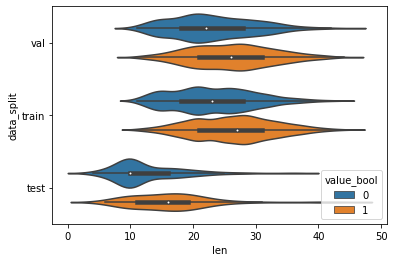

In [28]:
n_total = 10000 # desired size of dataset
max_seq_length = 25 # max length of peptide (min is 10)
max_linker_length = 15 # linker allowed here

average_unit_length = (max_linker_length/2) + 6 #length of a linker+waltz seq
pos_rate = average_unit_length/max_seq_length # need to sample at this rate to avoid getting too many positively labeled seq
print('pos_rate',pos_rate)

random.seed(42)
np.random.seed(42)

n_train = round(n_total*.80)
n_val = n_total-n_train
# n_test = n_total-n_train-n_val
print(n_train,n_val)
n_examples = {
    'train':n_train,
    'val':n_val,
    # 'test':n_test
}

df_list = []
for data_split,group_df in waltz_df.groupby('data_split',sort=False):
    data_list = []
    for i in range(n_examples[data_split]):
        pos_seqs = list(group_df[group_df['value_bool']==True].sequence)
        neq_seqs = list(group_df[group_df['value_bool']==False].sequence)
        seq,res_labels = sample_recombined_sequence(max_seq_length,
                                           pos_seqs,
                                           neq_seqs,
                                           max_linker_length,
                                           pos_rate=pos_rate)
        data_list.append([seq,res_labels])
    split_df = pd.DataFrame(data_list,columns=['sequence','res_value_bool'])
    split_df['data_split'] = data_split
    df_list.append(split_df)
recombine_waltz_df = pd.concat(df_list,ignore_index=True)
recombine_waltz_df['value_bool'] = recombine_waltz_df['res_value_bool'].apply(get_seq_label)
recombine_waltz_df['len'] = recombine_waltz_df['sequence'].apply(len)
recombine_waltz_df['dataset'] = 'waltz_recombine'
recombine_waltz_df = pd.concat([recombine_waltz_df,serrano_df],ignore_index=True)
recombine_waltz_df.to_csv(f'{data_dir}/sbxw_fibrillation_peptide_waltz-recombine-maxlen25-linker15.csv')
display(recombine_waltz_df.head())
display(recombine_waltz_df.groupby(['data_split','value_bool']).size())
sns.violinplot(data=recombine_waltz_df,x='len',y='data_split',hue='value_bool')

# waltz-recombined-maxlen50-linker15

pos_rate 0.27
8000 2000


,sequence,res_value_bool,data_split,value_bool,len,dataset
0,VSIVYKDCTHGGETSTTIIESTQDRNCQQQYNPDGGQRCQ,1111110000000000000000000000000000000000,val,1,40,waltz_recombine
1,YSGSNSTSTQHGWLIMGPRGNCFILCE,000000000011111100011111100,val,1,27,waltz_recombine
2,TNKHEGKDDNDKLVTVYVRHCTPQDNDQHSNNQNTFKRGTDCSGHDGD,000000000000111111000000000000111111000000000000,val,1,48,waltz_recombine
3,NHPSKEESDKKEKGSHTSSDRSEDVGQGSTGEPNHSTQGSK,00000000000000000000000000000000000000000,val,0,41,waltz_recombine
4,CGCKNHDGRTKGSPN,000000000000000,val,0,15,waltz_recombine


data_split  value_bool
test        0              172
            1               76
train       0             3962
            1             4038
val         0              972
            1             1028
dtype: int64

<AxesSubplot:xlabel='len', ylabel='data_split'>

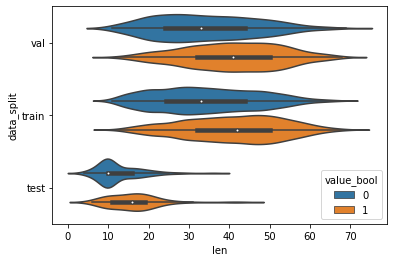

In [29]:
n_total = 10000 # desired size of dataset
max_seq_length = 50 # max length of peptide (min is 10)
max_linker_length = 15 # linker allowed here

average_unit_length = (max_linker_length/2) + 6 #length of a linker+waltz seq
pos_rate = average_unit_length/max_seq_length # need to sample at this rate to avoid getting too many positively labeled seq
print('pos_rate',pos_rate)

random.seed(42)
np.random.seed(42)

n_train = round(n_total*.80)
n_val = n_total-n_train
# n_test = n_total-n_train-n_val
print(n_train,n_val)
n_examples = {
    'train':n_train,
    'val':n_val,
    # 'test':n_test
}

df_list = []
for data_split,group_df in waltz_df.groupby('data_split',sort=False):
    data_list = []
    for i in range(n_examples[data_split]):
        pos_seqs = list(group_df[group_df['value_bool']==True].sequence)
        neq_seqs = list(group_df[group_df['value_bool']==False].sequence)
        seq,res_labels = sample_recombined_sequence(max_seq_length,
                                           pos_seqs,
                                           neq_seqs,
                                           max_linker_length,
                                           pos_rate=pos_rate)
        data_list.append([seq,res_labels])
    split_df = pd.DataFrame(data_list,columns=['sequence','res_value_bool'])
    split_df['data_split'] = data_split
    df_list.append(split_df)
recombine_waltz_df = pd.concat(df_list,ignore_index=True)
recombine_waltz_df['value_bool'] = recombine_waltz_df['res_value_bool'].apply(get_seq_label)
recombine_waltz_df['len'] = recombine_waltz_df['sequence'].apply(len)
recombine_waltz_df['dataset'] = 'waltz_recombine'
recombine_waltz_df = pd.concat([recombine_waltz_df,serrano_df],ignore_index=True)
recombine_waltz_df.to_csv(f'{data_dir}/sbxw_fibrillation_peptide_waltz-recombine-maxlen50-linker15.csv')
display(recombine_waltz_df.head())
display(recombine_waltz_df.groupby(['data_split','value_bool']).size())
sns.violinplot(data=recombine_waltz_df,x='len',y='data_split',hue='value_bool')

# waltz-recombined-maxlen100-linker15

pos_rate 0.135
8000 2000


,sequence,res_value_bool,data_split,value_bool,len,dataset
0,TAWYAEDCTHGGETDSTPAESDKDRNCCHWQNFAGGQVQTVYKCQG...,0000000000000000000000000000000000000111111000...,val,1,64,waltz_recombine
1,KHEGKDDNVQIVYIKK,0000000011111100,val,1,16,waltz_recombine
2,RHCTPQDNDQHSLATVYRKRGTDCSGHDGDQQKQAAHPSKEKKGSHTS,000000000000000000000000000000000000000000000000,val,0,48,waltz_recombine
3,SDRSEQNYNNNLEPNHSTQGSKCSTVIWECKNHDGRTKGSPTVFPI...,0000000000000000000000000000000000000000000000...,val,0,101,waltz_recombine
4,ALALQTKDHNETVFHIGCTTHQSTVMIEQDGGNHGGHSQRGEKEQQ...,0000000000000000000000000000000000000000000000...,val,0,75,waltz_recombine


data_split  value_bool
test        0              172
            1               76
train       0             4595
            1             3405
val         0             1125
            1              875
dtype: int64

<AxesSubplot:xlabel='len', ylabel='data_split'>

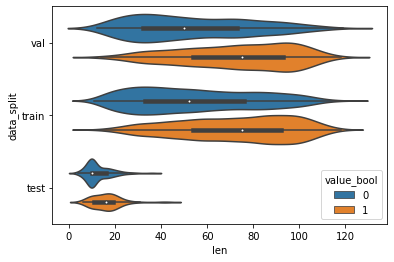

In [30]:
n_total = 10000 # desired size of dataset
max_seq_length = 100 # max length of peptide (min is 10)
max_linker_length = 15 # linker allowed here

average_unit_length = (max_linker_length/2) + 6 #length of a linker+waltz seq
pos_rate = average_unit_length/max_seq_length # need to sample at this rate to avoid getting too many positively labeled seq
print('pos_rate',pos_rate)

random.seed(42)
np.random.seed(42)

n_train = round(n_total*.80)
n_val = n_total-n_train
# n_test = n_total-n_train-n_val
print(n_train,n_val)
n_examples = {
    'train':n_train,
    'val':n_val,
    # 'test':n_test
}

df_list = []
for data_split,group_df in waltz_df.groupby('data_split',sort=False):
    data_list = []
    for i in range(n_examples[data_split]):
        pos_seqs = list(group_df[group_df['value_bool']==True].sequence)
        neq_seqs = list(group_df[group_df['value_bool']==False].sequence)
        seq,res_labels = sample_recombined_sequence(max_seq_length,
                                           pos_seqs,
                                           neq_seqs,
                                           max_linker_length,
                                           pos_rate=pos_rate)
        data_list.append([seq,res_labels])
    split_df = pd.DataFrame(data_list,columns=['sequence','res_value_bool'])
    split_df['data_split'] = data_split
    df_list.append(split_df)
recombine_waltz_df = pd.concat(df_list,ignore_index=True)
recombine_waltz_df['value_bool'] = recombine_waltz_df['res_value_bool'].apply(get_seq_label)
recombine_waltz_df['len'] = recombine_waltz_df['sequence'].apply(len)
recombine_waltz_df['dataset'] = 'waltz_recombine'
recombine_waltz_df = pd.concat([recombine_waltz_df,serrano_df],ignore_index=True)
recombine_waltz_df.to_csv(f'{data_dir}/sbxw_fibrillation_peptide_waltz-recombine-maxlen100-linker15.csv')
display(recombine_waltz_df.head())
display(recombine_waltz_df.groupby(['data_split','value_bool']).size())
sns.violinplot(data=recombine_waltz_df,x='len',y='data_split',hue='value_bool')